In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
# Load data
df = pd.read_csv("zomato.csv")

In [4]:
# Check column names
print("Column Names:")
print(df.columns)

Column Names:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'restaurant name', 'restaurant type',
       'rate (out of 5)', 'num of ratings', 'avg cost (two people)',
       'online_order', 'table booking', 'cuisines type', 'area',
       'local address'],
      dtype='object')


In [5]:
# Drop unnecessary columns if they exist
columns_to_drop = ["Unnamed: 0.1", "Unnamed: 0"]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

In [6]:
# Quick scan of dataset
print("Dataset Overview:")
print(df.info())
print(df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant name        7105 non-null   object 
 1   restaurant type        7105 non-null   object 
 2   rate (out of 5)        7037 non-null   float64
 3   num of ratings         7105 non-null   int64  
 4   avg cost (two people)  7048 non-null   float64
 5   online_order           7105 non-null   object 
 6   table booking          7105 non-null   object 
 7   cuisines type          7105 non-null   object 
 8   area                   7105 non-null   object 
 9   local address          7105 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 555.2+ KB
None
       rate (out of 5)  num of ratings  avg cost (two people)
count      7037.000000     7105.000000            7048.000000
mean          3.514253      188.921042             540.286

In [7]:
# Number of missing values per column
missing_values = df.isna().sum()
print("Missing Values per Column:")
print(missing_values)


Missing Values per Column:
restaurant name           0
restaurant type           0
rate (out of 5)          68
num of ratings            0
avg cost (two people)    57
online_order              0
table booking             0
cuisines type             0
area                      0
local address             0
dtype: int64


In [8]:
# Fill missing values in 'rate (out of 5)' and 'avg cost (two people)' columns with mean
for col in ["rate (out.of.5)", "avg cost (two.people)"]:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

# Number of duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [9]:
# Summary of counts
summary_count = {
    'total_rows': len(df),
    'total_restaurant_types': df['restaurant type'].nunique() if 'restaurant type' in df.columns else None,
    'total_unique_addresses': df['local address'].nunique() if 'local address' in df.columns else None,
    'total_unique_areas': df['area'].nunique() if 'area' in df.columns else None,
    'total_unique_cuisines': df['cuisines type'].nunique() if 'cuisines type' in df.columns else None,
}
print("Summary of Counts:")
print(summary_count)

Summary of Counts:
{'total_rows': 7105, 'total_restaurant_types': 81, 'total_unique_addresses': 90, 'total_unique_areas': 30, 'total_unique_cuisines': 2175}


In [10]:
# Verify 'table booking' column exists and has correct values
if 'table booking' in df.columns:
    # Debug print to check unique values
    print("Unique values in 'table booking':", df['table booking'].unique())
    
    table_booking_counts = df['table booking'].value_counts().reset_index()
    table_booking_counts.columns = ['table_booking', 'count']
    table_booking_counts['percentage'] = (table_booking_counts['count'] / len(df)) * 100

    print("\nCounts with Percentages for Table Booking:")
    print(table_booking_counts)

    # Check if both "Yes" and "No" are present in the counts
    if "Yes" in table_booking_counts['table_booking'].values and "No" in table_booking_counts['table_booking'].values:
        if table_booking_counts.loc[table_booking_counts['table_booking'] == "Yes", 'count'].values[0] > \
           table_booking_counts.loc[table_booking_counts['table_booking'] == "No", 'count'].values[0]:
            print("\nRecommendation: Focus on enhancing table booking features to capture more customer engagement.")
        else:
            print("\nObservation: There are more online orders than table booking.")
    else:
        print("\nData is missing either 'Yes' or 'No' in 'table booking' column.")
else:
    print("The 'table booking' column is not found in the DataFrame.")


Unique values in 'table booking': ['No' 'Yes']

Counts with Percentages for Table Booking:
  table_booking  count  percentage
0            No   6361   89.528501
1           Yes    744   10.471499

Observation: There are more online orders than table booking.


In [11]:
# Separate rows for each cuisine type and clean up whitespace
cuisine_counts = (df.assign(cuisines_type=df['cuisines type'].str.split(','))
                  .explode('cuisines_type')
                  .assign(cuisines_type=lambda x: x['cuisines_type'].str.strip())
                  .value_counts('cuisines_type')
                  .reset_index(name='frequency'))

# Find the maximum frequency
max_frequency = cuisine_counts['frequency'].max()

# Get the cuisine types with the maximum frequency
max_frequency_cuisines = cuisine_counts[cuisine_counts['frequency'] == max_frequency]

# Print the results
print("Cuisines with Maximum Frequency:")
for index, row in max_frequency_cuisines.iterrows():
    print(f"Cuisine Type: {row['cuisines_type']}, Frequency: {row['frequency']}")


Cuisines with Maximum Frequency:
Cuisine Type: North Indian, Frequency: 3237


In [12]:
# Separate rows for each cuisine type and clean up whitespace
cuisine_summary = (df.assign(cuisines_type=df['cuisines type'].str.split(','))
                   .explode('cuisines_type')
                   .assign(cuisines_type=lambda x: x['cuisines_type'].str.strip()))

# Count the number of restaurants in each area
area_counts = cuisine_summary['area'].value_counts().reset_index()
area_counts.columns = ['area', 'restaurant_count']

# Find the area with the least number of restaurants
least_restaurants_area = area_counts.loc[area_counts['restaurant_count'].idxmin()]

# Print the result
print("Area with the Least Number of Restaurants:")
print(f"Area: {least_restaurants_area['area']}, Restaurant Count: {least_restaurants_area['restaurant_count']}")


Area with the Least Number of Restaurants:
Area: Residency Road, Restaurant Count: 46


C:\Users\hp\AppData\Local\Temp\ipykernel_16068\2320084389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_restaurant_types.index, x=top_restaurant_types.values, palette='viridis')


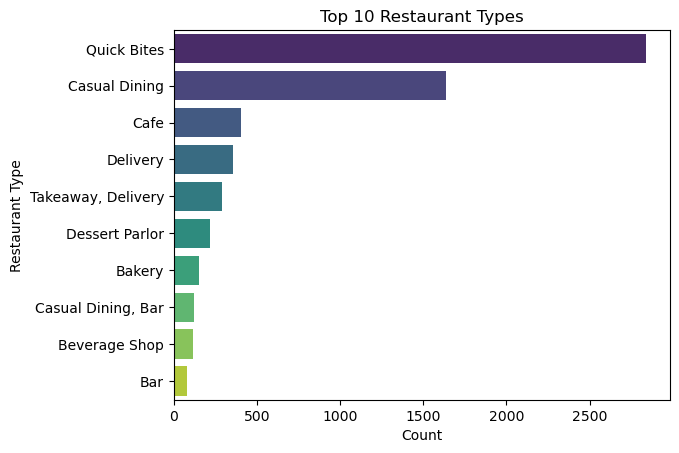

In [13]:
# Visualization 1: Top 10 most common restaurant types
if 'restaurant type' in df.columns:
    top_restaurant_types = df['restaurant type'].value_counts().nlargest(10)
    sns.barplot(y=top_restaurant_types.index, x=top_restaurant_types.values, palette='viridis')
    plt.title("Top 10 Restaurant Types")
    plt.xlabel("Count")
    plt.ylabel("Restaurant Type")
    plt.show()

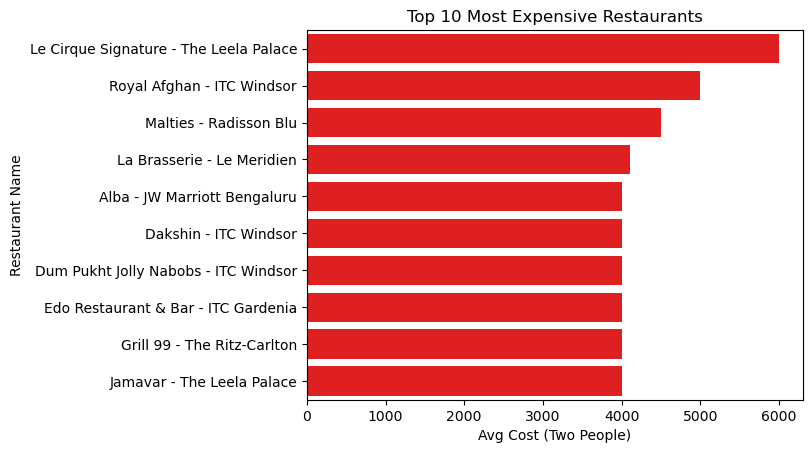

In [14]:
# Visualization 2: Top 10 most expensive restaurants
if 'avg cost (two people)' in df.columns and 'restaurant name' in df.columns:
    top_expensive_restaurants = df.nlargest(10,'avg cost (two people)')[['restaurant name', 'avg cost (two people)']]
    sns.barplot(y=top_expensive_restaurants['restaurant name'], x=top_expensive_restaurants['avg cost (two people)'], color='red')
    plt.title("Top 10 Most Expensive Restaurants")
    plt.xlabel("Avg Cost (Two People)")
    plt.ylabel("Restaurant Name")
    plt.show()


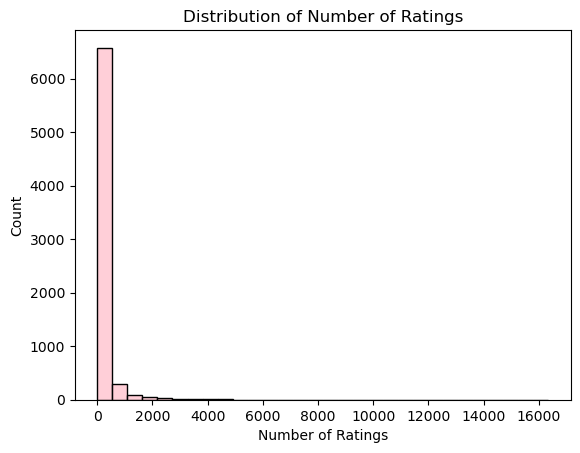

In [15]:
# Visualization 3: Histogram - Distribution of Number of Ratings
if 'num of ratings' in df.columns:
    sns.histplot(df['num of ratings'], bins=30, kde=False, color='pink')
    plt.title("Distribution of Number of Ratings")
    plt.xlabel("Number of Ratings")
    plt.ylabel("Count")
    plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_16068\4080057976.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cuisines_data.index, x=cuisines_data.values, palette='Blues')


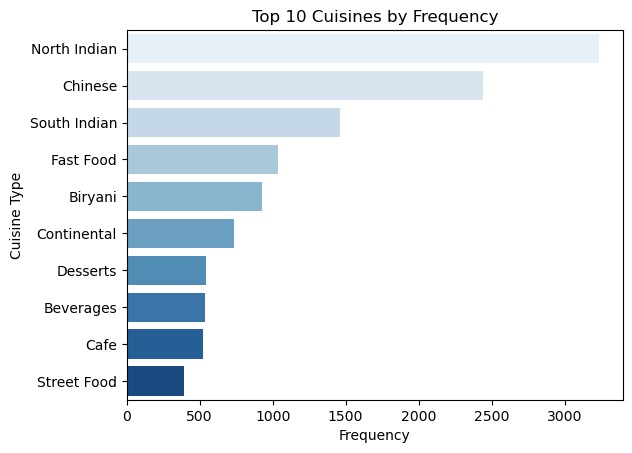

In [16]:
# Visualization 4: Top 10 Cuisines by frequency
if 'cuisines type' in df.columns:
    cuisines_data = df['cuisines type'].str.split(',', expand=True).stack().str.strip().value_counts().nlargest(10)
    sns.barplot(y=cuisines_data.index, x=cuisines_data.values, palette='Blues')
    plt.title("Top 10 Cuisines by Frequency")
    plt.xlabel("Frequency")
    plt.ylabel("Cuisine Type")
    plt.show()

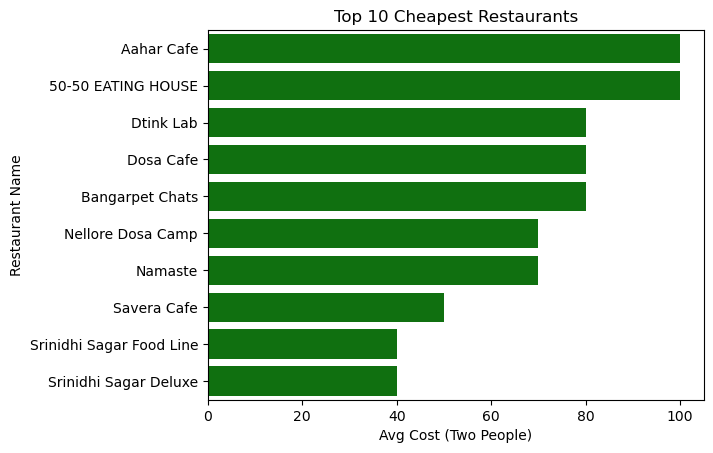

In [17]:
# Visualization: Top 10 cheapest restaurants in ascending order of average cost
if 'avg cost (two people)' in df.columns and 'restaurant name' in df.columns:
    # Sort and reverse the order for plotting from lowest to highest cost
    top_cheap_restaurants = df.nsmallest(10, 'avg cost (two people)')[['restaurant name', 'avg cost (two people)']]
    top_cheap_restaurants = top_cheap_restaurants.iloc[::-1]  # Reverse the order

    sns.barplot(y=top_cheap_restaurants['restaurant name'], x=top_cheap_restaurants['avg cost (two people)'], color='green')
    plt.title("Top 10 Cheapest Restaurants")
    plt.xlabel("Avg Cost (Two People)")
    plt.ylabel("Restaurant Name")
    plt.show()


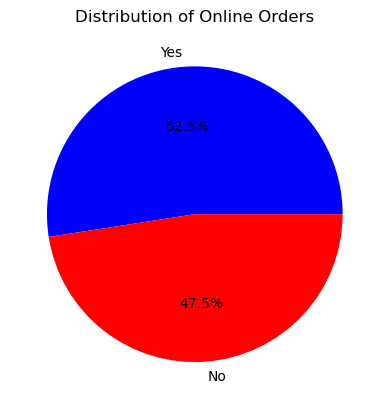

In [18]:
# Visualization 6: Pie Chart - Online Order Distribution
if 'online_order' in df.columns:
    df['online_order'] = df['online_order'].fillna('No')  # Ensure no NaNs
    online_order_counts = df['online_order'].value_counts()
    online_order_counts.plot.pie(autopct='%1.1f%%', colors=['blue', 'red'], labels=['Yes', 'No'])
    plt.title("Distribution of Online Orders")
    plt.ylabel("")
    plt.show()

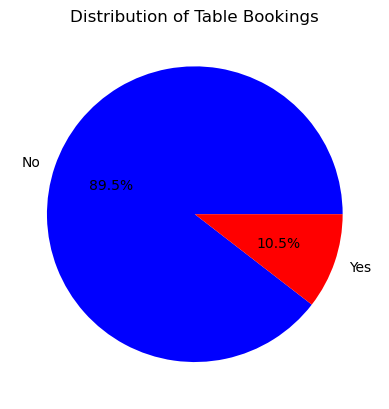

In [19]:
# Visualization 7: Pie Chart - Table Booking Distribution
if 'table booking' in df.columns:
    # Ensure 'table_booking_counts' is defined as earlier
    table_booking_counts = df['table booking'].value_counts().reset_index()
    table_booking_counts.columns = ['table booking', 'count']
    
    # Plotting pie chart
    plt.pie(
        table_booking_counts['count'], 
        labels=table_booking_counts['table booking'], 
        autopct='%1.1f%%', 
        colors=['blue', 'red']
    )
    plt.title("Distribution of Table Bookings")
    plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_16068\3415289773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_areas.index, x=top_areas.values, palette='plasma')


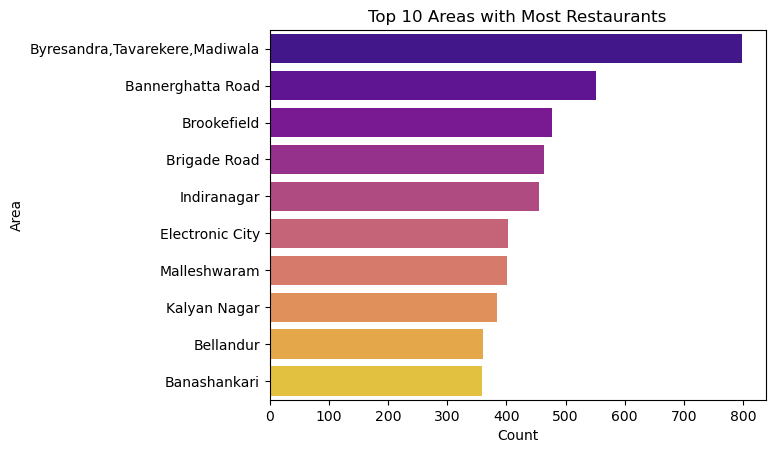

In [20]:
# Visualization 8: Top 10 Areas with Most Restaurants
if 'area' in df.columns:
    top_areas = df['area'].value_counts().nlargest(10)
    sns.barplot(y=top_areas.index, x=top_areas.values, palette='plasma')
    plt.title("Top 10 Areas with Most Restaurants")
    plt.xlabel("Count")
    plt.ylabel("Area")
    plt.show()

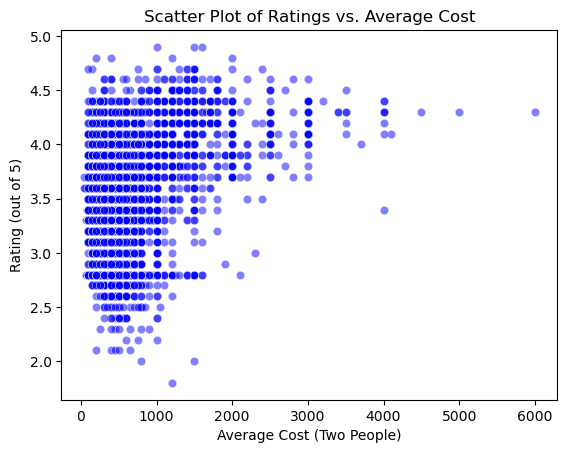

In [21]:
# Visualization 9: Scatter Plot - Ratings vs. Average Cost
if 'avg cost (two people)' in df.columns and 'rate (out of 5)' in df.columns:
    sns.scatterplot(x='avg cost (two people)', y='rate (out of 5)', data=df, color='blue', alpha=0.5)
    plt.title("Scatter Plot of Ratings vs. Average Cost")
    plt.xlabel("Average Cost (Two People)")
    plt.ylabel("Rating (out of 5)")
    plt.show()

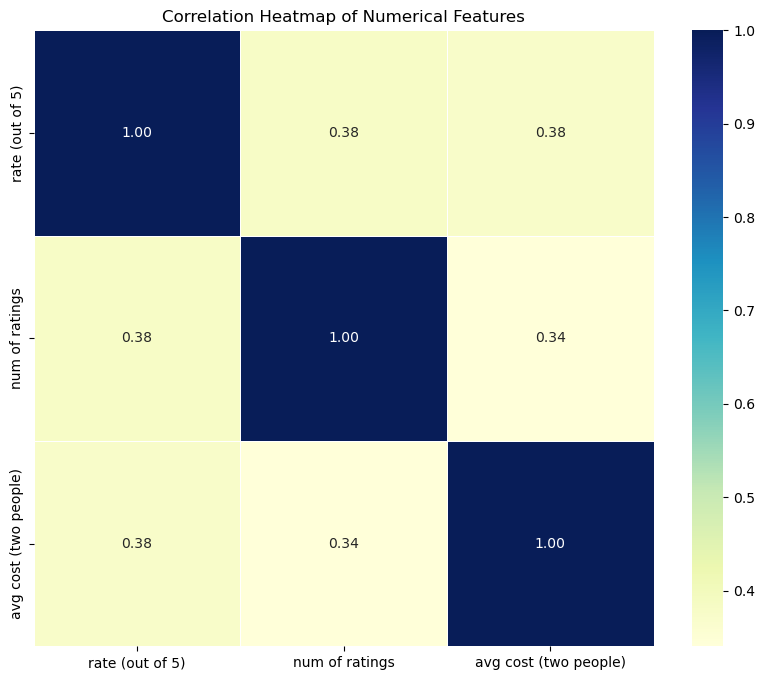

In [22]:
# Heatmap 10: Correlation between numerical variables
plt.figure(figsize=(10, 8))

# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Mean Squared Error: 0.1858314975567801


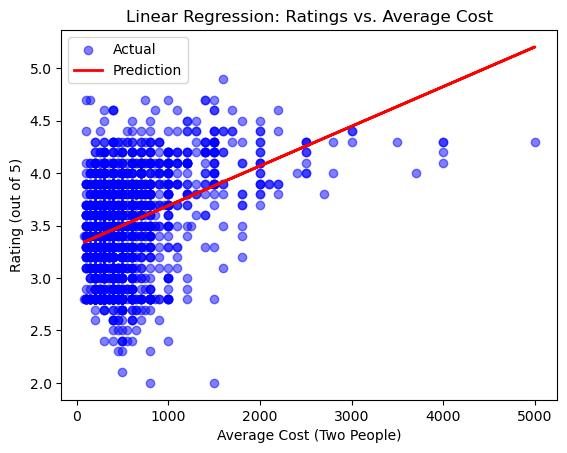

In [23]:
# Linear Regression: Predict 'rate (out of 5)' based on 'avg cost (two people)'
if 'avg cost (two people)' in df.columns and 'rate (out of 5)' in df.columns:
    # Drop rows with NaN values in relevant columns
    df_cleaned = df[['avg cost (two people)', 'rate (out of 5)']].dropna()
    X = df_cleaned[['avg cost (two people)']]
    y = df_cleaned['rate (out of 5)']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    
    # Plot the regression line with scatter plot
    plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
    plt.title("Linear Regression: Ratings vs. Average Cost")
    plt.xlabel("Average Cost (Two People)")
    plt.ylabel("Rating (out of 5)")
    plt.legend()
    plt.show()


In [27]:
from sklearn.preprocessing import LabelEncoder

# Drop irrelevant columns and handle missing values
zomato_data = df.drop(columns=['restaurant name', 'local address'])
zomato_data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in ['restaurant type', 'table booking', 'cuisines type', 'area']:
    le = LabelEncoder()
    zomato_data[column] = le.fit_transform(zomato_data[column])
    label_encoders[column] = le


In [28]:
# Target: 'online_order'
# Features: All other columns
X = zomato_data.drop(columns=['online_order'])
y = zomato_data['online_order']


In [29]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [30]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:\n", class_report)


Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

          No       0.58      0.43      0.49       979
         Yes       0.59      0.73      0.65      1117

    accuracy                           0.59      2096
   macro avg       0.59      0.58      0.57      2096
weighted avg       0.59      0.59      0.58      2096



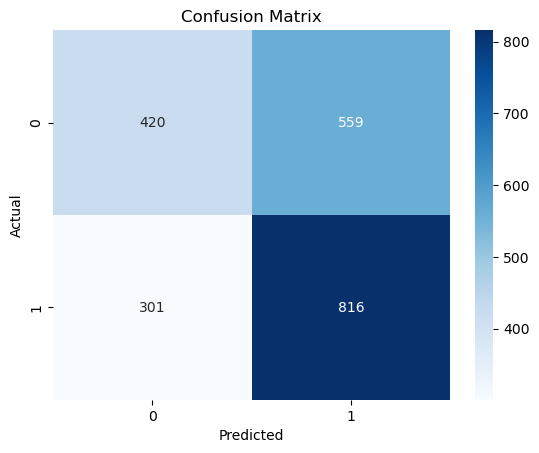

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
